In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
# relative paths
PATH_BASES = '../../data/raw/bases_bicimad.csv'
PATH_BIKES = '../../data/raw/bike_data.csv'
df_bases = pd.read_csv(PATH_BASES, encoding = "ISO-8859-1", delimiter=';')
df_bikes = pd.read_csv(PATH_BIKES, delimiter=',')

In [476]:
df_bikes['idplug_base'] = df_bikes['idplug_base'].apply(str)
df_bikes['idunplug_base'] = df_bikes['idunplug_base'].apply(str)
df_bikes['idplug_station'] = df_bikes['idplug_station'].apply(str)
df_bikes['idunplug_station'] = df_bikes['idunplug_station'].apply(str)
df_bikes['user_type']   = df_bikes['user_type'].apply(str)
df_bikes['ageRange']   = df_bikes['ageRange'].apply(str)
df_bikes['datetime_unplug'] = pd.to_datetime(df_bikes['unplug_hourTime'])

In [4]:
df_bases.head()

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,LONGITUD,LATITUD,DIRECCION
0,001a,"440394,55","4474280,53",41813,01 CENTRO,01-06 SOL,"PUERTA DEL SOL, PLAZA, DE LA",1 B,BiciMAD,24,-3.702575,40.417016,"PUERTA DEL SOL, PLAZA, DE LA,1 B"
1,001b,"440404,21","4474287,39",41813,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",1,BiciMAD,24,-3.702462,40.417078,"ALCALA, CALLE, DE,1"
2,2,"440134,83","4474678,23",41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,27,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE,1"
3,3,"440012,98","4475760,68",41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL,2"
4,4,"440396,4","4475565,36",41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,27,-3.702674,40.428591,"MANUELA MALASAÑA, CALLE, DE,3"


In [5]:
df_bikes.head()

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code
0,5b9058462f38434ab0d85cd3,ead1db07fa526e19fe237115d5516fbdc5acb99057b885...,5,17,16,40,1,263,0,2018-09-01T01:00:00.000+0200,NaN
1,5b9058462f38434ab0d85ce9,420d9e220bd8816681162e15e9afcb1c69c5a756090728...,12,26,52,85,1,382,2,2018-09-01T01:00:00.000+0200,28009
2,5b9058462f38434ab0d85ced,780f5c8157efe8e6dca44dbd689817d4b126364fca917f...,1,11,58,109,1,305,4,2018-09-01T01:00:00.000+0200,28004
3,5b9058462f38434ab0d85cee,a225ab7b4b74954cd9fbe8cc2ec63390cd04e92cdd1a2f...,1,1,120,168,1,262,4,2018-09-01T01:00:00.000+0200,28015
4,5b9058462f38434ab0d85cef,867f38545733bc5f0c69d2592d228e01b3a39daa143e8b...,19,8,80,89,1,310,4,2018-09-01T01:00:00.000+0200,28007


In [192]:
rides = df_bikes.shape[0]
print("Número de trayectos en el dataset: {}".format(rides))

Número de trayectos en el dataset: 398040


Tipo de los campos en los datasets

In [74]:
df_bikes.dtypes

id                  object
user_day_code       object
idplug_base         object
idunplug_base       object
idplug_station      object
idunplug_station    object
user_type           object
travel_time          int64
ageRange            object
unplug_hourTime     object
zip_code            object
dtype: object

In [5]:
df_bases.dtypes

Número               object
Gis_X                object
Gis_Y                object
Fecha de Alta         int64
Distrito             object
Barrio               object
Calle                object
Nº Finca             object
Tipo de Reserva      object
Número de Plazas      int64
LONGITUD            float64
LATITUD             float64
DIRECCION            object
dtype: object

## Análisis, limpieza y transformación de campos

### 1. Número de identificación de las bases

#### 1.1 ¿Coinciden las bases que tenemos en df_bases con las que aparecen en df_bikes?

In [6]:
unique_bases_1 = df_bases['Número'].unique()
print("Bases presentes en el listado de bases (df_bases): [Total: {}, Listado: {}]".format(len(unique_bases_1), unique_bases_1))

Bases presentes en el listado de bases (df_bases): [Total: 172, Listado: ['001a' '001b' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '020 ampliacion' '021a' '021b' '22' '23'
 '24' '025a' '025b' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50'
 '51' '52' '53' '54' '55' '56' '57' '58' '59' '60' '61' '62' '63' '65'
 '67' '68' '69' '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '080a'
 '080b' '81' '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92' '93'
 '94' '95' '96' '97' '98' '99' '100' '101' '102' '103' '104' '105' '106'
 '107' '108' '109' '110' '111a' '111b' '112' '113' '114' '115' '116a'
 '116b' '117' '118' '119' '120' '121' '122' '123' '124' '125' '126' '127'
 '128' '129' '130' '131' '132' '133' '134' '135' '136' '137' '138' '139'
 '140' '141' '142' '143' '144' '145' '146' '147' '148' '149' '150' '151'
 '152' '153' '154' '155' '156' '157' '158' '159' '160' '1

In [9]:
plug_station_not_found =  np.in1d(df_bikes['idplug_station'].unique(), unique_bases_1, assume_unique=True)
print("Bases en df_bikes[idplug_station] sin correspondencia en df_bases: {}".format(np.sort(df_bikes['idplug_station'].unique()[~plug_station_not_found])))
unplug_station_not_found =  np.in1d(df_bikes['idunplug_station'].unique(), unique_bases_1, assume_unique=True)
print("Bases en df_bikes[idunplug_station] sin correspondencia en df_bases: {}".format(np.sort(df_bikes['idunplug_station'].unique()[~unplug_station_not_found])))

Bases en df_bikes[idplug_station] sin correspondencia en df_bases: ['1' '111' '116' '168' '169' '170' '171' '172' '173' '174' '175' '21' '25'
 '64' '66' '80']
Bases en df_bikes[idunplug_station] sin correspondencia en df_bases: ['1' '111' '116' '168' '169' '170' '171' '172' '173' '174' '175' '21' '25'
 '64' '66' '80']


Estas estaciones aparecen en el dataset df_bikes, pero no en el listado que se proporciona de las bases (dataset df_bases). Esto se debe a una de estas dos razones:
- Estaciones que en el listado de bases no tienen identificador númerico, sino que aparecen dos estaciones con la misma numeración acompañadas de una letra, indicando así dos estaciones cercanas. Para estos casos, sustituiremos los valores en df_bikes (Número: XXX) por uno de los valores en presente en df_bases (Número: XXXa). 
- Estaciones que no tienen correspondencia de ningún tipo con las estaciones presentes en df_bases. Probablemente se deba a que la construcción del dataset generado de estaciones fue previo a la captura de datos de trayectos y no contiene algunas estaciones que ya aparecen en los trayectos. Para este análisis, por falta de tiempo, no tendremos en cuenta dichas estaciones. Otra opción sería acceder a los datos abiertos actuales del Ayuntamiento de Madrid para completar estas estaciones. 

#### 1.2 Limpieza de los campos 'idplug_station' y 'idunplug_station' en df_bikes

In [46]:
bases_dict = {
    '1': '001a',
    '111': '111a',
    '116': '116a',
    '21': '021a',
    '25': '025a',
    '80': '080a'
}

def clean_bases(base):
    return bases_dict.get(base, base)

In [47]:
df_bikes['idplug_station'] = df_bikes['idplug_station'].map(clean_bases)
df_bikes['idunplug_station'] = df_bikes['idunplug_station'].map(clean_bases)

## 2. Duración de los trayectos:

In [148]:
df_bikes['travel_time'] = df_bikes['travel_time']/60 # minutes
df_bikes['travel_time'].describe()

count    398040.000000
mean         17.730740
std          60.266696
min           0.016667
25%           7.916667
50%          11.983333
75%          18.133333
max       22443.050000
Name: travel_time, dtype: float64

La desviación típica para la duración de los viajes es muy elevada, lo que indica presencia de valores extremos (el valor máximo de duración de un viaje son 22443 minutos, 15 días, por lo que probablemente sea un error, un robo o una labor de mantenimiento). Para usar esta variable, convendría realizar una transformación a una distribución logarítmica para anular el efecto de los valores extremos.

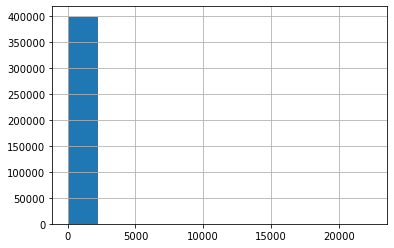

In [155]:
df_bikes['travel_time'].hist(bins=10)

En este gráfico apenas podemos apreciar la distribución, por la existencia de valores extremos. Al transformarlo a una distribución logarítima ya podemos observar los datos sin que estos valores extremos tengan tanto impacto:

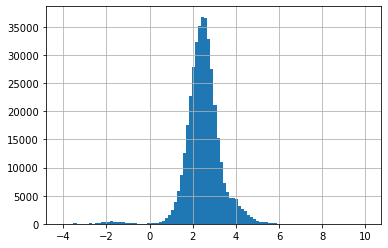

In [149]:
np.log(df_bikes['travel_time']).hist(bins=100)

#### 2.1. Detección de outliers en la duración de los trayectos

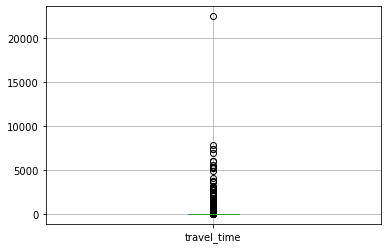

In [160]:
df_bikes.boxplot('travel_time')

De nuevo, al existir valores tan extremos, no alcanzamos a ver los valores presentes en el rango intercuatílico (IQR). Gráfica sin valores outliers:

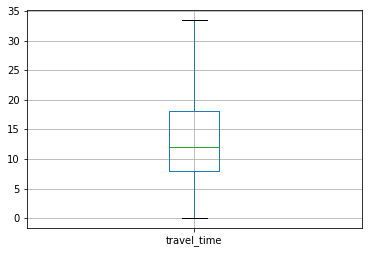

In [159]:
df_bikes.boxplot('travel_time', sym='') # plot without fliers, default whis=1.5

Para eliminar o tratar los outliers, podemos emplear varios métodos. Uno de ellos es considerar los outliers como los valores que se encuentran fueran del rango [Q1 - 1.5IQR, Q3 + 1.5IQR]:
- [TODO] Detectar outliers con otros métodos - DBSCAN,...


In [390]:
Q1 = df_bikes['travel_time'].quantile(0.25)
Q3 = df_bikes['travel_time'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower limit: {}".format(lower_limit))
print("Upper limit: {}".format(upper_limit))
print("% of outliers (values ouside of [Q1 - 1.5IQR, Q3 + 1.5IQR]: {}".format(df_bikes[df_bikes['travel_time'] > upper_limit].shape[0]/df_bikes.shape[0]*100))

Lower limit: -7.4083333333333306
Upper limit: 33.45833333333333
% of outliers (values ouside of [Q1 - 1.5IQR, Q3 + 1.5IQR]: 8.513717214350317


Análisis de la duración de los trayectos sin tener en cuenta los outliers: 
- Podríamos filtrar el porcentaje de outliers ya que es asumible la pérdida de un 8.5% de información.
- Para el límite superior podemos utilizar el que hemos calculado usando [Q3 + 1.5IQR] = 33.45 minutos. Sin embargo, como esta duración de trayecto es normal, vamos a filtrar por valores más extremos: 50 minutos (cuantil 0.95)
- Para el límite inferior, no podemos utilizar el calculado usando [Q1 - 1.5IQR] porque es inferior a cero (lo que no tiene sentido para la variable que nos ocupa). Para fijar este límite utilizaremos un valor elegido manualmente de 4.1 minutos (cuantil 0.05).
- Filtrando la información entre estos dos cuantiles, estamos perdiendo alrededor del 10% de información. 

In [391]:
lower_limit = df_bikes['travel_time'].quantile(0.05)
upper_limit = df_bikes['travel_time'].quantile(0.95)
print("% de valores anómalos (filtrados): {}".format(100*(rides - df_bikes_normal_travel_time.shape[0])/rides))

% de valores anómalos (filtrados): 10.00502462064114


In [477]:
df_bikes_normal_travel_time = df_bikes[(df_bikes['travel_time'] < upper_limit) & (df_bikes['travel_time'] > lower_limit)]

In [479]:
df_bikes_normal_travel_time['travel_time'].describe()

count    358216.000000
mean         14.049544
std           8.146763
min           4.116667
25%           8.300000
50%          11.983333
75%          17.250000
max          49.250000
Name: travel_time, dtype: float64

La media de los trayectos se encuentra alrededor de los 14 minutos. Un ejemplo en Madrid de un trayecto correspondiente a 14 minutos en bici es un trayecto entre Plaza de España y Plaza de Emilio Castelar, que supone alrededor de 34 minutos andando. Este sería un trayecto estándar que realizarían los usuarios de bicimad.

### 2.2 Análisis outliers inferiores

Hemos eliminado los tryaectos cuya duración se encuentra por debajo de los 4.1 minutos. Esto podrían ser en su mayoría bicis que estaban defectuosas y el usuario ha tenido que devolver casi inmediatamente. Analicemos en cuántos de estos trayectos la estación de desenganche y devolución es la misma:

In [235]:
df_bikes_shortest_travel_time = df_bikes[df_bikes['travel_time'] < lower_limit]

In [196]:
print("Número de trayectos de duración inferior a 4.1 minutos: {} ({} % del total)".format(df_bikes_low_travel_time.shape[0], 100*df_bikes_low_travel_time.shape[0]/rides))

Número de trayectos de duración inferior a 4.1 minutos: 19700 (4.9492513315244695 % del total)


De estos trayectos, ¿cuántas bicis fueron devueltas (prácticamente inmediatamente) a la misma estación en la que se desengancharon?

In [215]:
df_bikes_shortest_travel_time[df_bikes_low_travel_time['idplug_station'] == df_bikes_shortest_travel_time['idunplug_station']]['travel_time'].describe()['mean']

0.3734447539461468

In [236]:
print("Número de usuarios que devolvieron la bici en la misma estación que la desengancharon: {}, resultando en una duración de trayecto muy baja: {} minutos (de media)".format(  
    df_bikes_shortest_travel_time[df_bikes_shortest_travel_time['idplug_station'] == df_bikes_shortest_travel_time['idunplug_station']].shape[0],
     df_bikes_shortest_travel_time[df_bikes_shortest_travel_time['idplug_station'] == df_bikes_shortest_travel_time['idunplug_station']]['travel_time'].describe()['mean']))

Número de usuarios que devolvieron la bici en la misma estación que la desengancharon: 3949, resultando en una duración de trayecto muy baja: 0.3734447539461468 minutos (de media)


Alrededor de 4000 usuarios sufrieron la situación de desenganchar una bici defectuosa y tener que devolverla inmediatamente (medio minuto) en la misma estación. 
La política de BiciMad antes averías es la siguiente (según su página web):
_"Deberé volver a anclar la bicicleta en la misma estación antes de cinco minutos y comunicarlo a través de cualquiera de los siguientes canales: totém de la estación, en el teléfono 900 50 54 63 o en la aplicación para móvil BiciMAD."_
Suponiendo que los usuarios en esta situación llamasen para comunicar dicha avería, esto resultaría en una pérdida de 3949 trayectos * 0.5€ trayecto (mínimo de media hora) = 1974.5 €. Probablemente, un gran porcentaje de usuarios no realice dicha gestión, por lo que las pérdidas económicas no serían el aspecto importante de esta situación sino la pérdida de reputación de marca BiciMad para con el usuario. 

In [237]:
df_bikes_shortest_travel_time[df_bikes_shortest_travel_time['idplug_station'] == df_bikes_shortest_travel_time['idunplug_station']].groupby('user_type').size()

user_type
3    3949
dtype: int64

Sin embargo, al estudiar qué usuarios han sufrido esta problemática, nos encontramos con que todos estos viajes están asignados al tipo de usuario 3 (trabajador de la empresa). 
No tiene sentido que no exista ningún trayecto con esta problemática para usuarios de tipo 0, 1 y 2. Una posible explicación es que el sistema, al ser notificado de estas bicis defectuosas, asigne el tipo de usuario 3 para no realizar el cobro al usuario final. 

### 2.2 Análisis outliers superiores

In [238]:
df_bikes_longest_travel_time = df_bikes[df_bikes['travel_time'] > upper_limit]

Análisis por tipo de usuario:

In [239]:
df_bikes_longest_travel_time.groupby('user_type').size()

user_type
0      580
1    19794
2     2341
3    11173
dtype: int64

Muchos de estos trayectos corresponden al tipo de usuario 3 (trabajador de la empresa), por lo que podrían ser bicicletas bajo mantenimiento. En cuanto al resto de usuarios, analicemos cómo de largos son estos viajes:

Text(0.5, 1.0, 'Usuario ocasional')

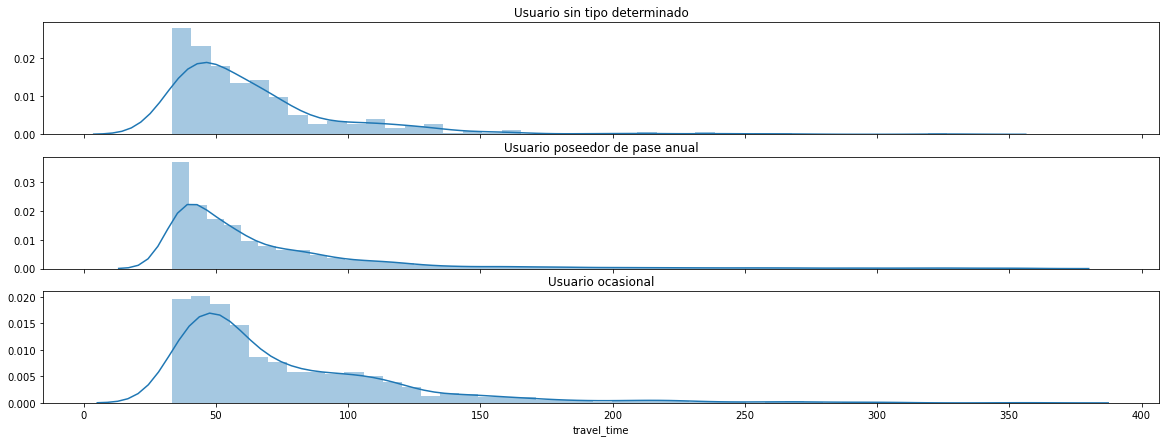

In [251]:
f, axes = plt.subplots(3, 1, figsize=(20,7), sharex=True)
sns.distplot(df_bikes_longest_travel_time[df_bikes_longest_travel_time['user_type'] == '0']['travel_time'], ax = axes[0])
axes[0].label_outer()
axes[0].set_title('Usuario sin tipo determinado')
sns.distplot(df_bikes_longest_travel_time[df_bikes_longest_travel_time['user_type'] == '1']['travel_time'], ax = axes[1])
axes[1].label_outer()
axes[1].set_title('Usuario poseedor de pase anual')
sns.distplot(df_bikes_longest_travel_time[df_bikes_longest_travel_time['user_type'] == '2']['travel_time'], ax = axes[2])
axes[2].set_title('Usuario ocasional')


Para el usuario indeterminado se puede observar que la distribución de la duración de estos trayectos es intermedia al usuario poseedor de pase anual y usuario ocasional (engloba a ambos tipos de usuario). 
La distribución de la duración de trayectos para el usuario ocasional es considerablemente diferente al del usuario poseedor de bono. Probablemente se deba a que estos usuarios son turistas y utilizan el servicio BiciMad como medio de transporte para una visita turística por la ciudad. 

Veamos cuáles son las estaciones más utilizadas para estos usuarios (tipo 2, ocasional) en estos trayectos largos:

In [252]:
df_bikes_longest_travel_time_tourists = df_bikes_longest_travel_time[df_bikes_longest_travel_time['user_type'] == '2']

In [273]:
# Top 15 estaciones en las que estos supuestos turistas desengancharon las bicicletas
df_bikes_longest_travel_time_tourists.groupby('idunplug_station').size().reset_index(name = 'rides_per_station').sort_values(by='rides_per_station', ascending=False).head(15).merge(df_bases[['Número', 'Barrio', 'DIRECCION']], left_on='idunplug_station', right_on='Número')

,idunplug_station,rides_per_station,Número,Barrio,DIRECCION
0,135,79,135,07-05 RÍOS ROSAS,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N"
1,73,72,73,03-03 ESTRELLA,"ASTROS, PLAZA, DE LOS,S/N"
2,132,62,132,07-05 RÍOS ROSAS,"SANTA ENGRACIA, CALLE, DE,168"
3,54,58,54,01-04 JUSTICIA,"BARCELO, CALLE, DE,7"
4,10,51,10,01-04 JUSTICIA,"MARQUES DE LA ENSENADA, CALLE, DEL,16"
5,56,46,56,01-06 SOL,"CARMEN, PLAZA, DEL,1"
6,26,39,26,01-04 JUSTICIA,"SALESAS, PLAZA, DE LAS,8"
7,34,38,34,01-03 CORTES,"JACINTO BENAVENTE, PLAZA, DE,S/N"
8,2,37,2,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE,1"
9,69,33,69,03-05 JERÓNIMOS,"ALFONSO XII, CALLE, DE,54"


In [275]:
# Top 15 estaciones en las que estos supuestos turistas devolvieron las bicicletas
df_bikes_longest_travel_time_tourists.groupby('idplug_station').size().reset_index(name = 'rides_per_station').sort_values(by='rides_per_station', ascending=False).head(15).merge(df_bases[['Número', 'Barrio', 'DIRECCION']], left_on='idplug_station', right_on='Número')

,idplug_station,rides_per_station,Número,Barrio,DIRECCION
0,135,97,135,07-05 RÍOS ROSAS,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N"
1,132,72,132,07-05 RÍOS ROSAS,"SANTA ENGRACIA, CALLE, DE,168"
2,86,63,86,01-03 CORTES,"PRADO, PASEO, DEL,S/N"
3,73,53,73,03-03 ESTRELLA,"ASTROS, PLAZA, DE LOS,S/N"
4,56,44,56,01-06 SOL,"CARMEN, PLAZA, DEL,1"
5,90,42,90,04-01 RECOLETOS,"GOYA, CALLE, DE,18"
6,26,39,26,01-04 JUSTICIA,"SALESAS, PLAZA, DE LAS,8"
7,10,37,10,01-04 JUSTICIA,"MARQUES DE LA ENSENADA, CALLE, DEL,16"
8,122,37,122,07-04 ALMAGRO,"SANTA ENGRACIA, CALLE, DE,16"
9,40,32,40,01-02 EMBAJADORES,"CONDE DE ROMANONES, CALLE, DEL,2"


## 3. Sobre los usuarios:

### 3.1 Variables sociodemográficas: Código postal

In [75]:
df_bikes['zip_code'].unique()

array([nan, '28009', '28004', '28015', '28007', '28021', '28005', '28028',
       '28010', '28012', '28001', '28045', '28013', '28053', '28016',
       '28011', '28014', '28002', '28033', '28909', '28008', '28003',
       '28035', '28036', '28006', '28030', '28046', '28041', '28511',
       '28523', '28020', '28240', '28924', '28019', '11007', '28039',
       '28232', '28925', '28025', '28042', '28109', '28023', '28280',
       '28029', '28022', '28260', '28044', '11500', '28935', '29801',
       '28807', '28027', '28224', '28040', '28032', '28031', '28945',
       '28231', '28700', '28120', '28752', '28043', '28018', '28026',
       '48092', '28050', '28034', '28500', '28400', '28411', '28100',
       '28821', '28460', '28038', '28047', '28850', '28017', '28942',
       '28760', '28670', '28064', '11130', '48940', '28805', '28941',
       '28223', '28981', '2008', '28934', '28037', '29040', '03680',
       '37006', '28270', '24002', '28806', '28220', '26006', '45600',
       '28901', 

Podemos ver que hay varios códigos postales que no son códigos postales (emails, texto). Usando la BBDD de Correos, podemos encontrar los códigos postales válidos de toda España y hacer así un análisis completo sobre el origen de los usuarios que poseen un pase anual. Para este análisis, como solución más sencilla, filtraremos en primer lugar los valores no numéricos y a continuación sólo detectaremos qué códigos postales pertenecen a Madrid (asumiendo el resto como C.P.s de fuera de Madrid). 

Como solución más completa, sería interesante analizar los códigos postales no correctos para detectar si es un problema en el diseño del sistema que captura la información (puede que no sea suficientemente intuitiva para el usuario) e incluir procesos de validación para mejorar la calidad de este dato. 

2.1.1 Limpieza y transformación del campo 'zip_code'

In [80]:
for idx, user_type in enumerate(np.sort(df_bikes['user_type'].unique())):
    print("Registros totales para user_type = {} con valor no válido de código postal: {} ({} % del total de registros para este usuario)"
          .format(user_type, 
                  df_bikes[df_bikes['user_type'] == user_type]['zip_code'].isna().sum(),
                  100*df_bikes[df_bikes['user_type'] == user_type]['zip_code'].isna().sum()/len(df_bikes[df_bikes['user_type'] == user_type])))

Registros totales para user_type = 0 con valor no válido de código postal: 1624 (100.0 % del total de registros para este usuario)
Registros totales para user_type = 1 con valor no válido de código postal: 156123 (42.52711691736082 % del total de registros para este usuario)
Registros totales para user_type = 2 con valor no válido de código postal: 5538 (97.98301486199576 % del total de registros para este usuario)
Registros totales para user_type = 3 con valor no válido de código postal: 21567 (91.1923890063425 % del total de registros para este usuario)


Para los usuarios de tipo 0, 2 y 3 no disponemos de apenas registros con el campo código postal válido. Esto era esperable, ya que estos usuarios son ocasionales/no determinados/trabajadores de la empresa. Para este análisis, sólo nos interesan los usuarios que poseen un pase anual('user_type' == '1'). 

In [30]:
zip_code_madrid_dict = {}
f = open("../../data/raw/other-data/zipcodes_madrid.txt", "r")
for x in f:
    zip_code_madrid_dict[int(x[:5])] = x[6:-1]

In [95]:
def is_a_zip_code_from_madrid(zip_code):
    if zip_code in zip_code_madrid_dict.keys():
        return 'Madrid'
    elif (zip_code == 0):
        return 'Dato no valido'
    return 'Fuera de Madrid'

Para el usuario poseedor de pase anual:

In [147]:
zip_code_annual_user_values = pd.to_numeric(df_bikes[df_bikes['user_type'] == '1']['zip_code'], errors='coerce').fillna(0).astype('Int64').map(is_a_zip_code_from_madrid).value_counts()
print("Trayectos realizados por usuarios de la Comunidad de Madrid: {} ({} % del total)".format(zip_code_annual_user_values['Madrid'], 100*zip_code_annual_user_values['Madrid']/zip_code_annual_user_values.sum()))

Trayectos realizados por usuarios de la Comunidad de Madrid: 207021 (56.391475127617035 % del total)


La mitad de los usuarios poseedores de un pase anual pertenecen a la Comunidad de Madrid. 

[TODO] Obtener la renta por barrio, analizar si existe relación entre la cantidad de usuarios de cada código postal y la renta de dicho distrito. 

### 3.2 Variables sociodemográficas: Análisis por tipo de usuario y rango de edad

In [264]:
df_bikes['user_type'].unique()

array(['1', '3', '2', '0'], dtype=object)

In [216]:
user_type_dict = {
    '0': 'Usuario sin tipo',
    '1': 'Usuario anual',
    '2': 'Usuario ocasional',
    '3': 'Trabajador'
}

In [217]:
for idx, user_type in enumerate(['0', '1', '2', '3']):
    print("Número de trayectos realizados por [{}]: {} ({} % del total )".format(user_type_dict.get(user_type),
                                                                                                    df_bikes.groupby('user_type').size()[user_type],
                                                                                                    df_bikes.groupby('user_type').size()[user_type]/rides*100))

Número de trayectos realizados por [Usuario sin tipo]: 1624 (0.4079991960606974 % del total )
Número de trayectos realizados por [Usuario anual]: 367114 (92.23042910260276 % del total )
Número de trayectos realizados por [Usuario ocasional]: 5652 (1.4199577931866145 % del total )
Número de trayectos realizados por [Trabajador]: 23650 (5.941613908149935 % del total )


La mayoría de los trayectos (el 92%) corresponde a trayectos realizados por usuarios poseedores de un pase anual. 

In [110]:
df_bikes[df_bikes['user_type'] == '0'].groupby('ageRange').size()

ageRange
0    1624
dtype: int64

In [111]:
df_bikes[df_bikes['user_type'] == '2'].groupby('ageRange').size()

ageRange
0    5535
2       2
3      35
4      62
5      18
dtype: int64

Para los usuarios de tipo 0 y 2, la mayor parte de los datos no contiene un rango de edad válido, por lo que sólo analizaremos el tipo de usuario poseedor de pase anual.

In [268]:
df_bikes['ageRange'].unique()

array(['0', '2', '4', '3', '5', '1', '6'], dtype=object)

In [113]:
user_age_dict = {
    '0': 'Usuario con edad indeterminada',
    '1': '0-16 años',
    '2': '17-18 años',
    '3': '19-26 años',
    '4': '27-40 años',
    '5': '41-65 años',
    '6': '66+ años',
}

In [118]:
rides_annual_user = df_bikes[df_bikes['user_type']=='1'].shape[0]

In [124]:
df_bikes[df_bikes['user_type']=='1'].groupby('ageRange').size()['0']

151619

In [125]:
for idx, user_age in enumerate(['0', '1', '2', '3', '4', '5', '6']):
    print("Número de trayectos realizados por usuarios de edad [{}]: {} ({} % del total )".format(user_age_dict.get(user_age),
                                                                                                    df_bikes[df_bikes['user_type']=='1'].groupby('ageRange').size()[user_age],
                                                                                                    df_bikes[df_bikes['user_type']=='1'].groupby('ageRange').size()[user_age]/rides_annual_user*100))

Número de trayectos realizados por usuarios de edad [Usuario con edad indeterminada]: 151619 (41.30025005856491 % del total )
Número de trayectos realizados por usuarios de edad [0-16 años]: 781 (0.21274045664289565 % del total )
Número de trayectos realizados por usuarios de edad [17-18 años]: 4234 (1.1533202220563639 % del total )
Número de trayectos realizados por usuarios de edad [19-26 años]: 23220 (6.325010759600561 % del total )
Número de trayectos realizados por usuarios de edad [27-40 años]: 114943 (31.30989283982632 % del total )
Número de trayectos realizados por usuarios de edad [41-65 años]: 70602 (19.231628322537414 % del total )
Número de trayectos realizados por usuarios de edad [66+ años]: 1715 (0.4671573407715315 % del total )


Text(0.5, 1.0, 'Distribución de los usuarios poseedores de pase anual en rango de edad')

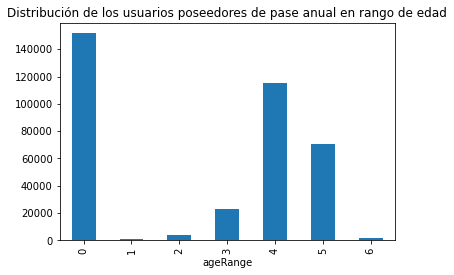

In [276]:
df_bikes[df_bikes['user_type']=='1'].groupby('ageRange').size().plot.bar()
plt.title("Distribución de los usuarios poseedores de pase anual en rango de edad")

La mayoría de los usuarios (alrededor del 30%) pertenecen al rango de edad de entre 27 y 40 años, seguidos del rango de edad de entre 41 y 65 (alrededor del 20%), que super al número de usuarios menores de 25 años. Podría ser porque estos usuarios menores de 25 años no vayan a la universidad en bicicleta, mientras que los trajadores sí la usan con este fin. 

### 3.3 Trayectos por día

¿Cuántas veces al día utilizan los usuarios el servicio de BiciMad?

In [292]:
df_bikes[df_bikes['user_type'] == '0'].groupby(['user_day_code'])['id'].count().describe()

count    774.000000
mean       2.098191
std        5.300362
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       76.000000
Name: id, dtype: float64

In [293]:
df_bikes[df_bikes['user_type'] == '1'].groupby(['user_day_code'])['id'].count().describe()

count    214765.000000
mean          1.709375
std           0.958364
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          17.000000
Name: id, dtype: float64

In [294]:
df_bikes[df_bikes['user_type'] == '2'].groupby(['user_day_code'])['id'].count().describe()

count    3243.000000
mean        1.742831
std         1.119002
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: id, dtype: float64

Tanto por la cantidad de trayectos de los que disponemos como por la utilidad del análisis, elegiremos sólo el tipo de usuario que posee un pase anual. Además, el comportamiento es muy similar al usuario ocasional (métricas estadísticas similares). 

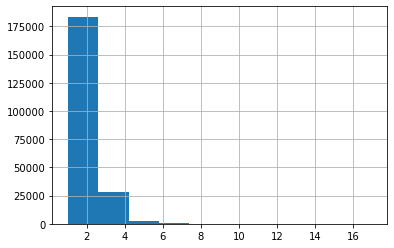

In [297]:
df_bikes[df_bikes['user_type'] == '1'].groupby(['user_day_code'])['id'].count().hist(bins=10)

La mayoría de usuarios realiza entre 1 y 2 viajes al día. Sin embargo, disponemos de registros de usuarios que han realizado más de 10 trayectos en un día.
[TODO]̣ Analizar qué significan estos trayectos (estaciones por las que han pasado, rango de edad)

In [305]:
df_bikes[df_bikes['user_type'] == '1'].groupby(['user_day_code'])['id'].count().sort_values(ascending=False).head(10)

user_day_code
c109aa90eecc8bfb2e4e2a33d90cb0559838c37270ee7447b4aec17c1f44244f    17
063b133a535287442c7a01045f56b59626659394ffe38b763c033dca1046e927    16
a697581b267d5383587b8692fcc6c6c77c925a3ba8e166735bd7352cbd6a18ef    16
78e916aba401072ec0c7aa59a6d91cd8d1a35e793274bffa65058c35a20095d3    15
b02bd4d6a2fe5ab32c31eb1d3bb1a3bfd12544afbc2fe6b64edcb490c8c3db3a    15
2530dc37ab3558448462ad37f45933de2a3e53304a1e3fc746da0101acf626d9    15
4b12865aacdd608aabea4d193700ca98a38c77a8fe18aca525bf31442f7e092b    14
0469101764f9f251cfd06469fbae9ec321e4e3d64dbf07f3eb45239cf74a02b3    14
a4ccab27a69bafb306e9c662842e250db2e4edfdaec13c4839c8b149224fb1a4    14
c9907ab6c12d341c25cd277c14ab63531db02deae0de45419de324aa5724f322    13
Name: id, dtype: int64

## 4. Distancia entre origen y destino

#### 4.1. Análisis de calidad: cuántos trayectos tienen vacíos los campos de id de estación de origen/destino

In [113]:
print('Campos vacíos de estación de origen: {} ({}% del total)'.format(df_bikes['idunplug_station'].isna().sum(), df_bikes['idunplug_station'].isna().sum()/df_bikes.shape[0]*100))
print('Campos vacíos de estación de destino: {} ({}% del total)'.format(df_bikes['idplug_station'].isna().sum(), df_bikes['idplug_station'].isna().sum()/df_bikes.shape[0]*100))

Campos vacíos de estación de origen: 0 (0.0% del total)
Campos vacíos de estación de destino: 0 (0.0% del total)


#### 4.2 Cálculo de la distancia

- Solución óptima: Acceder a la API de Google Maps para calcular la distancia real entre dos distancias (en bici). 
- Solución actual (por falta de tiempo): Cálculo de la distancia usando la fórmula de semiverseno (https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno). Esta formula calcula la distancia de círculo máximo entre dos puntos de una esfera. La utilizaremos únicamente para dividir los viajes en largos y cortos.

In [36]:
def haversine_distance(src_latitude, src_longitude, dst_latitude, dst_longitude):
    r = 6371
    phi1 = np.radians(src_latitude)
    phi2 = np.radians(dst_latitude)
    delta_phi = np.radians(dst_latitude - src_latitude)
    delta_lambda = np.radians(dst_longitude - src_longitude)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

In [37]:
# mapping dicts to transform station-id to long/lat
bases_to_long = df_bases[['Número', 'LONGITUD']].set_index('Número').T.to_dict('list')
bases_to_long = {key: value[0] for key, value in bases_to_long.items()}
bases_to_lat = df_bases[['Número', 'LATITUD']].set_index('Número').T.to_dict('list')
bases_to_lat = {key: value[0] for key, value in bases_to_lat.items()}

In [38]:
# new column with the calculated distance
df_bikes['haver_distance'] = haversine_distance(df_bikes['idplug_station'].map(bases_to_lat), df_bikes['idplug_station'].map(bases_to_long), df_bikes['idunplug_station'].map(bases_to_lat), df_bikes['idunplug_station'].map(bases_to_long))

In [49]:
df_bikes['haver_distance'].describe() #excluding NaN values

count    316235.000000
mean          2.344154
std           1.366865
min           0.000000
25%           1.320000
50%           2.230000
75%           3.220000
max           7.410000
Name: haver_distance, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a347bcee0>]],
      dtype=object)

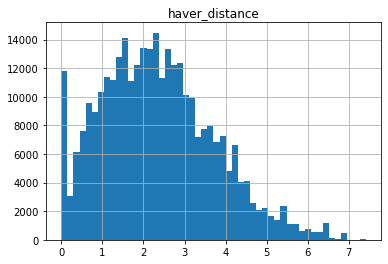

In [46]:
df_bikes.hist('haver_distance', bins=50)

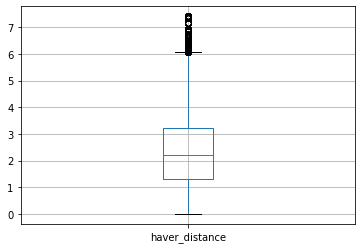

In [42]:
df_bikes.boxplot('haver_distance')

## 5. Análisis por fecha y hora

#### 5.1 Análisis por día de la semana

In [421]:
# aux function to transform numeric day of week to string
def day_of_week_to_string(day):
    switcher = {
        0: 'Mon',
        1: 'Tue',
        2: 'Wed',
        3: 'Thu',
        4: 'Fri',
        5: 'Sat',
        6: 'Sun',       
    }
    return switcher.get(day)

In [481]:
df_bikes['day_of_week'] = df_bikes['datetime_unplug'].dt.dayofweek.map(day_of_week_to_string)
df_bikes['hour'] = df_bikes['datetime_unplug'].dt.hour
df_bikes['month'] = df_bikes['datetime_unplug'].dt.month
df_bikes['day'] = df_bikes['datetime_unplug'].dt.day

Sólo vamos a usar los datos cuyo duración de trayecto no es anómala y descartar trayectos correspondientes a usuarios de la empresa

In [487]:
df_bikes_clean = df_bikes_normal_travel_time
df_bikes_clean = df_bikes_clean[df_bikes_clean['user_type'] != '3']

In [488]:
df_rides_per_day = df_bikes_clean.groupby(['day', 'day_of_week', 'month']).count()['id'].reset_index(name='rides')
df_rides_per_day.head()

,day,day_of_week,month,rides
0,1,Sat,9,8232
1,2,Sun,9,8164
2,3,Mon,9,12472
3,4,Tue,9,13738
4,5,Wed,9,13959


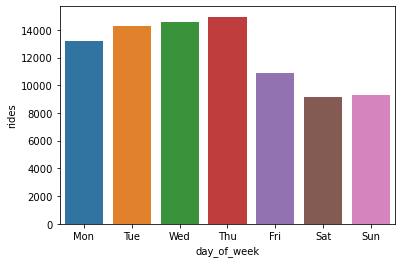

In [489]:
rides_per_day_of_week = df_rides_per_day.groupby('day_of_week')['rides'].mean().reset_index()
day_of_week_sorter = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
rides_per_day_of_week['day_of_week'] = pd.Categorical(a['day_of_week'], day_of_week_sorter)
rides_per_day_of_week.sort_values(by='day_of_week')
sns.barplot(rides_per_day_of_week['day_of_week'], rides_per_day_of_week['rides'])

De media, existen menos trayectos los fines de semana que los días entre semana. Probablemente se deba a que gran parte de los trayectos corresponde a usuarios usando el servicio de BiciMad para ir/volver al trabajo.

#### 5.2 Análisis por hora

#### 5.2.1 Análisis por hora durante el fin de semana

In [504]:
df_rides_per_day_per_hour = df_bikes_clean.groupby(['day_of_week', 'day', 'hour']).count()['id'].reset_index(name='rides')
df_rides_per_day_per_hour.head(10)

,day_of_week,day,hour,rides
0,Fri,7,0,466
1,Fri,7,1,241
2,Fri,7,2,181
3,Fri,7,3,107
4,Fri,7,4,71
5,Fri,7,5,62
6,Fri,7,6,93
7,Fri,7,7,487
8,Fri,7,8,981
9,Fri,7,9,812


In [505]:
rides_per_day_per_hour = df_rides_per_day_per_hour.groupby(['day_of_week', 'hour'])['rides'].mean().reset_index()
#day_of_week_sorter = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#rides_per_day_of_week['day_of_week'] = pd.Categorical(a['day_of_week'], day_of_week_sorter)
#rides_per_day_of_week.sort_values(by='day_of_week')
sns.barplot(rides_per_day_per_hour['day_of_week'], rides_per_day_of_week['rides'])

/home/irene/anaconda3/envs/keepler-bicimad-env/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


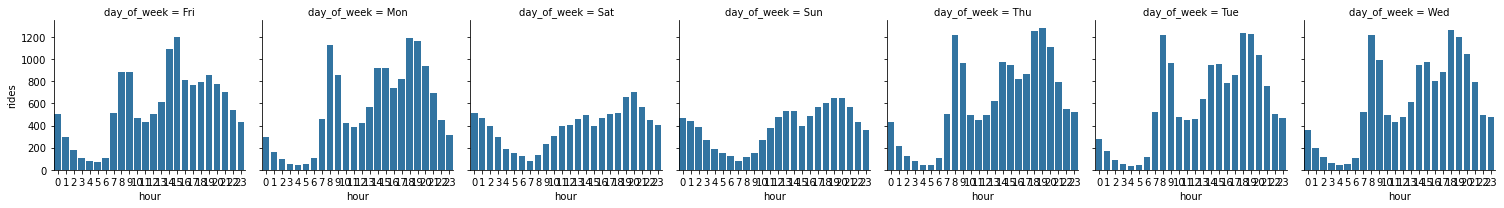

In [507]:
g = sns.FacetGrid(rides_per_day_per_hour, col='day_of_week')
g.map(sns.barplot, 'hour', 'rides')

#### 5.2.1 Análisis por hora entre semana

## 6. Cálculo de las estaciones más populares y más rentables

### 6.1 Estaciones más populares

Antes de realizar el análisis, vamos a eliminar los trayectos que corresponden a trabajadores de la empresa así como los trayectos anómalos (obtenidos en la sección XX)

In [378]:
df_bikes_users = df_bikes_normal_travel_time[df_bikes_normal_travel_time['user_type'] != '3']

In [379]:
df_bikes_users.groupby('idunplug_station').size().reset_index(name='rides').sort_values(by='rides', ascending=False).head(15).merge(df_bases[['Número', 'Distrito', 'DIRECCION', 'Número de Plazas']], left_on='idunplug_station', right_on='Número')

,idunplug_station,rides,Número,Distrito,DIRECCION,Número de Plazas
0,163,4915,163,02 ARGANZUELA,"ESPERANZA, PASEO, DE LA,",24
1,57,4653,57,01 CENTRO,"SANTA CRUZ DE MARCENADO, CALLE, DE,24",27
2,135,4536,135,07 CHAMBERÍ,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N",24
3,149,4396,149,05 CHAMARTÍN,"LA HABANA, PASEO, DE,42",24
4,90,4227,90,04 SALAMANCA,"GOYA, CALLE, DE,18",24
5,43,4152,43,01 CENTRO,"LAVAPIES, CALLE, DE,36",24
6,160,3910,160,05 CHAMARTÍN,"COLOMBIA, CALLE, DE,7",24
7,129,3826,129,07 CHAMBERÍ,"JOSE ABASCAL, CALLE, DE,33",24
8,19,3757,19,01 CENTRO,"PRIM, CALLE, DE,4",24
9,46,3724,46,02 ARGANZUELA,"RIBERA DE CURTIDORES, CALLE, DE LA,28",24


In [380]:
df_bikes_users.groupby('idplug_station').size().reset_index(name='rides').sort_values(by='rides', ascending=False).head(15).merge(df_bases[['Número', 'Distrito', 'DIRECCION', 'Número de Plazas']], left_on='idplug_station', right_on='Número')

,idplug_station,rides,Número,Distrito,DIRECCION,Número de Plazas
0,135,5901,135,07 CHAMBERÍ,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N",24
1,163,4898,163,02 ARGANZUELA,"ESPERANZA, PASEO, DE LA,",24
2,57,4532,57,01 CENTRO,"SANTA CRUZ DE MARCENADO, CALLE, DE,24",27
3,43,4491,43,01 CENTRO,"LAVAPIES, CALLE, DE,36",24
4,149,4471,149,05 CHAMARTÍN,"LA HABANA, PASEO, DE,42",24
5,129,4345,129,07 CHAMBERÍ,"JOSE ABASCAL, CALLE, DE,33",24
6,90,4149,90,04 SALAMANCA,"GOYA, CALLE, DE,18",24
7,160,3894,160,05 CHAMARTÍN,"COLOMBIA, CALLE, DE,7",24
8,46,3809,46,02 ARGANZUELA,"RIBERA DE CURTIDORES, CALLE, DE LA,28",24
9,19,3758,19,01 CENTRO,"PRIM, CALLE, DE,4",24


Estas son las estaciones más populares (tanto para desenganchar como para devolver bicis). Tiene sentido que sean prácticamente las mismas, ya que, al estar bien situadas, serán populares como para ser el origen de trayectos como el destino. Ninguna de estas estaciones tiene un número anómalo de plazas, lo que podría impactar en tener más trayectos (al tener disponibles más bicicletas).

[TODO] Análisis de las estaciones para determinar si hay estaciones que funcionen más como "generadoras" (se desenganchan más bicis en ellas de las que se devuelven).

### 6.2 Trayectos más populares

In [381]:
df_bikes_users.groupby(['idplug_station', 'idunplug_station']).size().reset_index(name='rides').sort_values(by='rides', ascending=False).head(15)

,idplug_station,idunplug_station,rides
6355,135,57,247
19237,57,135,208
13064,175,135,201
8635,149,9,198
8550,149,163,190
6316,135,175,184
6269,135,132,184
6350,135,52,183
16031,38,175,176
11010,163,149,173


In [382]:
df_bikes_rides = df_bikes_users.groupby(['idplug_station', 'idunplug_station']).size().reset_index(name='rides').merge(df_bases[['Número', 'Distrito', 'DIRECCION']], left_on='idunplug_station', right_on='Número')
df_bikes_rides['Distrito_src'] = df_bikes_rides['Distrito']
df_bikes_rides['Direccion_src'] = df_bikes_rides['DIRECCION']
df_bikes_rides = df_bikes_rides.drop(columns=['Número', 'Distrito', 'DIRECCION'])
df_bikes_rides = df_bikes_rides.merge(df_bases[['Número', 'Distrito', 'DIRECCION']], left_on='idplug_station', right_on='Número')
df_bikes_rides['Distrito_dst'] = df_bikes_rides['Distrito']
df_bikes_rides['Direccion_dst'] = df_bikes_rides['DIRECCION']
df_bikes_rides = df_bikes_rides.drop(columns=['Número', 'Distrito', 'DIRECCION'])
df_bikes_rides.sort_values(by='rides', ascending=False).head(10)

,idplug_station,idunplug_station,rides,Distrito_src,Direccion_src,Distrito_dst,Direccion_dst
4931,135,57,247,01 CENTRO,"SANTA CRUZ DE MARCENADO, CALLE, DE,24",07 CHAMBERÍ,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N"
14107,57,135,208,07 CHAMBERÍ,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N",01 CENTRO,"SANTA CRUZ DE MARCENADO, CALLE, DE,24"
6353,149,9,198,01 CENTRO,"SAN MIGUEL, PLAZA, DE,9",05 CHAMARTÍN,"LA HABANA, PASEO, DE,42"
6281,149,163,190,02 ARGANZUELA,"ESPERANZA, PASEO, DE LA,",05 CHAMARTÍN,"LA HABANA, PASEO, DE,42"
4855,135,132,184,07 CHAMBERÍ,"SANTA ENGRACIA, CALLE, DE,168",07 CHAMBERÍ,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N"
4926,135,52,183,01 CENTRO,"SANTA ANA, PLAZA, DE,9",07 CHAMBERÍ,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N"
8239,163,149,173,05 CHAMARTÍN,"LA HABANA, PASEO, DE,42",02 ARGANZUELA,"ESPERANZA, PASEO, DE LA,"
4917,135,43,171,01 CENTRO,"LAVAPIES, CALLE, DE,36",07 CHAMBERÍ,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N"
7802,160,163,165,02 ARGANZUELA,"ESPERANZA, PASEO, DE LA,",05 CHAMARTÍN,"COLOMBIA, CALLE, DE,7"
4417,132,135,163,07 CHAMBERÍ,"SAN JUAN DE LA CRUZ, PLAZA, DE,S/N",07 CHAMBERÍ,"SANTA ENGRACIA, CALLE, DE,168"


Estos son los 10 trayectos más populares durante el mes de septiembre de 2018. 

#### 6.3 Estaciones más rentables:

Tarifas de BiciMad, según su página web:

Para usuarios con pase anual: 
- Primera fracción de 30 minutos: 0,50 €
- Siguiente fracción de 30 minutos: 0,60 €
- Bonificación por coger la bicicleta en estación excedentaria (con más de un 70% de ocupación): 0,10 €
- Bonificación por devolver la bicicleta en estación deficitaria (con menos de un 30% de ocupación): 0,10 €
- Bonificación por reserva anclaje en destino (no acumulable con bonificación por devolución en estación deficitaria): 0,10 €
- Tarifa de penalización por haber excedido las dos horas, por hora o fracción: 4 € 

Para usuarios ocasionales: 
- Tarifa primera hora o fracción: 2 €
- Tarifa segunda hora o fracción: 4 €
- Bonificación por coger la bicicleta en estación excedentaria (con más de un 70% de ocupación):0,10 €
- Bonificación por devolver la bicicleta en estación deficitaria (con menos de un 30% de ocupación): 0,10 €
- Bonificación por reserva anclaje en destino (no acumulable con bonificación por devolución en estación deficitaria): 0,10 €
- Tarifa de penalización por haber excedido las dos horas, por hora o fracción: 4 € 

Si, entre nuestros datos, dispusiéramos de la situación de cada una de las estaciones en t=0 (inicio del dataset) podríamos construir un proceso que calculase por horas el número de bicis y el número de plazas disponibles en cada estación por hora. De esta manera:
- Podríamos obtener horas puntas en las que algunas estaciones se encontrasen sin bicis o sin anclajes disponibles (estaciones que se beneficiarían de más anclajes/más bicis)
- Podríamos calcular el beneficio económico por trayecto teniendo en cuenta las bonificaciones por coger/devolver bici en estación excedentaria/deficitaria.


De momento, calcuraremos el precio por trayecto sin tener en cuenta dichas bonificaciones ni el precio del pase anual. Además, sólo tendremos en cuenta usuarios ocasionales y poseedores de pase anual, así como trayectos de duración normal. 

In [408]:
df_bikes_normal_travel_time_1_2 = df_bikes_normal_travel_time[(df_bikes_normal_travel_time['user_type'] == '1') | (df_bikes_normal_travel_time['user_type'] == '2')]

In [410]:
df_bikes_normal_travel_time_1_2

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code,revenue
0,5b9058462f38434ab0d85cd3,ead1db07fa526e19fe237115d5516fbdc5acb99057b885...,5,17,16,40,1,4.383333,0,2018-09-01T01:00:00.000+0200,NaN,0
1,5b9058462f38434ab0d85ce9,420d9e220bd8816681162e15e9afcb1c69c5a756090728...,12,26,52,85,1,6.366667,2,2018-09-01T01:00:00.000+0200,28009,0
2,5b9058462f38434ab0d85ced,780f5c8157efe8e6dca44dbd689817d4b126364fca917f...,1,11,58,109,1,5.083333,4,2018-09-01T01:00:00.000+0200,28004,0
3,5b9058462f38434ab0d85cee,a225ab7b4b74954cd9fbe8cc2ec63390cd04e92cdd1a2f...,1,1,120,168,1,4.366667,4,2018-09-01T01:00:00.000+0200,28015,0
4,5b9058462f38434ab0d85cef,867f38545733bc5f0c69d2592d228e01b3a39daa143e8b...,19,8,80,89,1,5.166667,4,2018-09-01T01:00:00.000+0200,28007,0
...,...,...,...,...,...,...,...,...,...,...,...,...
398035,5bb3f1122f38430d780005ec,0543138a1925d67c06cde2e697950be87a33c8f093f522...,24,5,19,161,1,8.750000,5,2018-09-28T08:00:00.000+0200,28003,0
398036,5bb3f1122f38430d780005ed,f1268f405525ec0cbc9d82cd094cf824f0ae03ee4bae1b...,14,2,84,135,1,12.450000,5,2018-09-28T08:00:00.000+0200,28045,0
398037,5bb3f1122f38430d780005ee,0c26f5985ebad9e09e541e9a1f192b518d6d627740934f...,10,3,1,31,1,4.766667,0,2018-09-28T08:00:00.000+0200,NaN,0
398038,5bb3f1122f38430d780005ef,7e7ea3a999d7b2562bcfa073350fae5cb3063694407a5f...,11,1,169,149,1,9.233333,0,2018-09-28T08:00:00.000+0200,NaN,0


In [383]:
def ride_to_revenue(travel_time, user_type):
    USER_TYPE_ANNUAL = '1'
    USER_TYPE_OCCASIONAL = '2'
    if user_type == USER_TYPE_ANNUAL:
        if travel_time <= 30:
            revenue = 0.5
        elif travel_time > 30:
            revenue = 0.5 + ( 0.6 * math.ceil((travel_time-1800)/1800) )
        if travel_time >= 120:  # more than 2 hours
            revenue += 4 * math.ceil((travel_time-120)/60) # how many hours are exceeding 2h  
    elif user_type == USER_TYPE_OCCASIONAL:
        if ride_time <= 30: # less than 1 hour
            revenue = 2
        elif travel_time > 30: # between 1 hour and 2 hours
            revenue = 2 + 4
        if travel_time > 120:
            revenue += 4 * math.ceil((travel_time-120)/60) # how many hours are exceeding 2h
    else:
        revenue = 0
    return revenue   

In [366]:
def compute_revenue(df):
    return ride_to_revenue(df['user_type'], df['travel_time'])

# PROBLEMA CON SETTINGWITHCOPY

In [414]:
df_bikes_normal_travel_time_1_2_copy = df_bikes_normal_travel_time_1_2.copy()
df_bikes_normal_travel_time_1_2_copy['revenue'] = df_bikes_normal_travel_time_1_2_copy.apply(compute_revenue, axis=1)

In [418]:
df_bikes_normal_travel_time_1_2_copy

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code,revenue
0,5b9058462f38434ab0d85cd3,ead1db07fa526e19fe237115d5516fbdc5acb99057b885...,5,17,16,40,1,4.383333,0,2018-09-01T01:00:00.000+0200,NaN,0
1,5b9058462f38434ab0d85ce9,420d9e220bd8816681162e15e9afcb1c69c5a756090728...,12,26,52,85,1,6.366667,2,2018-09-01T01:00:00.000+0200,28009,0
2,5b9058462f38434ab0d85ced,780f5c8157efe8e6dca44dbd689817d4b126364fca917f...,1,11,58,109,1,5.083333,4,2018-09-01T01:00:00.000+0200,28004,0
3,5b9058462f38434ab0d85cee,a225ab7b4b74954cd9fbe8cc2ec63390cd04e92cdd1a2f...,1,1,120,168,1,4.366667,4,2018-09-01T01:00:00.000+0200,28015,0
4,5b9058462f38434ab0d85cef,867f38545733bc5f0c69d2592d228e01b3a39daa143e8b...,19,8,80,89,1,5.166667,4,2018-09-01T01:00:00.000+0200,28007,0
...,...,...,...,...,...,...,...,...,...,...,...,...
398035,5bb3f1122f38430d780005ec,0543138a1925d67c06cde2e697950be87a33c8f093f522...,24,5,19,161,1,8.750000,5,2018-09-28T08:00:00.000+0200,28003,0
398036,5bb3f1122f38430d780005ed,f1268f405525ec0cbc9d82cd094cf824f0ae03ee4bae1b...,14,2,84,135,1,12.450000,5,2018-09-28T08:00:00.000+0200,28045,0
398037,5bb3f1122f38430d780005ee,0c26f5985ebad9e09e541e9a1f192b518d6d627740934f...,10,3,1,31,1,4.766667,0,2018-09-28T08:00:00.000+0200,NaN,0
398038,5bb3f1122f38430d780005ef,7e7ea3a999d7b2562bcfa073350fae5cb3063694407a5f...,11,1,169,149,1,9.233333,0,2018-09-28T08:00:00.000+0200,NaN,0


In [417]:
df_bikes_normal_travel_time_1_2_copy['revenue'].unique()

array([0])

Para analizar estos beneficios económicos, podríamos realizar una división del total de los trayectos para inferir su propósito, pudiendo ser este:
- Ir/volver al trabajo
- Dar un paseo el fin de semana
- Volver a casa los fines de semana después de actividades nocturnas
Y tratar de inferir el tipo de trayecto que genera más beneficio.